<a href="https://colab.research.google.com/github/kristantotanuwidjaja/machine-learning-fundamental/blob/main/CNN_Clean_vs_Messy_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lakukan import TensorFlow dan cek versinya. Pastikan bahwa versi dari TensorFlow diatas versi 2.

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.5.0


Persiapkan data.

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-07-27 07:21:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  6.04MB/s    in 13s     

2021-07-27 07:22:07 (5.04 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



Ekstrak data yang sebelumnya sudah diunduh. Lalu definisikan nama direktori untuk data latih dan data validasi menjadi 'train_dir' dan 'validation_dir'.

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Cek direktori data latih dan data validasi masing-masing memiliki sub-direktori 'clean' dan 'messy'. Setiap sub-direktori menyimpan gambar yang sesuai dengan nama sub-direktori tersebut. Pada sub-direktori ‘clean’ terdapat gambar-gambar ruangan yang rapi dan pada sub-direktori ‘messy’ terdapat gambar-gambar ruangan yang berantakan.

In [5]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [6]:
os.listdir('/tmp/images/val')

['messy', 'clean']

Tampung direktori dari setiap kelas pada direktori latih dan direktori validasi ke dalam variabel. Pembuatan direktori di sini akan dipakai saat menggunakan objek image data generator.

In [7]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

Berikutnya buat sebuah objek ImageDataGenerator untuk data training dan data testing. Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

Gunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Bangun arsitektur sebuah CNN.

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Setelah membuat arsitektur CNN, panggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Setelah menentukan loss function dan optimizer pada CNN, latih model menggunakan metode fit. Dengan menggunakan image data generator, parameter gambar dan labelnya tidak perlu dimasukkan. Image data generator otomatis akan melabeli sebuah gambar sesuai dengan direktori di mana gambar tersebut disimpan. Contohnya sebuah gambar yang terdapat di direktori clean, secara otomatis akan diberi label 'clean' oleh image data generator.

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 9s - loss: 0.7732 - accuracy: 0.5500 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 7s - loss: 0.6949 - accuracy: 0.5300 - val_loss: 0.6888 - val_accuracy: 0.8000
Epoch 3/25
25/25 - 7s - loss: 0.6964 - accuracy: 0.5400 - val_loss: 0.6632 - val_accuracy: 0.7500
Epoch 4/25
25/25 - 7s - loss: 0.6971 - accuracy: 0.5100 - val_loss: 0.6809 - val_accuracy: 0.5000
Epoch 5/25
25/25 - 7s - loss: 0.6970 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 6/25
25/25 - 7s - loss: 0.6915 - accuracy: 0.5300 - val_loss: 0.6860 - val_accuracy: 0.5500
Epoch 7/25
25/25 - 7s - loss: 0.6730 - accuracy: 0.6100 - val_loss: 0.6422 - val_accuracy: 0.7000
Epoch 8/25
25/25 - 7s - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.7500
Epoch 9/25
25/25 - 7s - loss: 0.6938 - accuracy: 0.5700 - val_loss: 0.6870 - val_accuracy: 0.5500
Epoch 10/25
25/25 - 7s - loss: 0.5847 - accuracy: 0.6900 - val_loss: 0.5295 - val_accuracy: 0.6000
Epoch 11/25
25/25 -

Saving 7.png to 7.png
7.png
messy


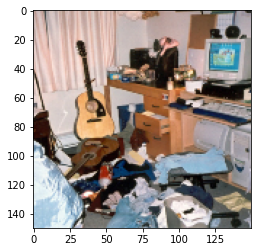

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')